In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

DATA_PATH = os.path.join('dataset')

In [2]:
def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, 'rsls.csv')
    return pd.read_csv(csv_path)

In [3]:
data = load_data()
data

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,80305,Snowbird Coffee,1352 A 9th Ave,San Francisco,CA,94110,NaN,NaN,NaN,1.415596e+10,80305_20190411,2019-04-11T00:00:00.000,94.0,Routine - Unscheduled,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk
53969,80233,Buffalo Kitchen,107 Leland Ave,San Francisco,CA,94134,NaN,NaN,NaN,NaN,80233_20190417,2019-04-17T00:00:00.000,75.0,Routine - Unscheduled,80233_20190417_103133,Foods not protected from contamination,Moderate Risk
53970,100216,BUNN MIKE,300 DE HARO ST,San Francisco,CA,94103,NaN,NaN,NaN,1.415530e+10,100216_20190321,2019-03-21T00:00:00.000,84.0,Routine - Unscheduled,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
53971,79430,City Discount Meat & Grocery Market,2298 Mission St,San Francisco,CA,94110,NaN,NaN,NaN,1.415544e+10,79430_20190418,2019-04-18T00:00:00.000,83.0,Routine - Unscheduled,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk


In [4]:
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_location        24095
business_phone_number    36539
inspection_id                0
inspection_date              0
inspection_score         14114
inspection_type              0
violation_id             13462
violation_description    13462
risk_category            13462
dtype: int64

In [5]:
###Пустые значения в категориальном признаке risk_category заменим на часто встречаемые значения

In [6]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(data[['risk_category']])
train = imp.transform(data[['risk_category']])

In [7]:
data['risk_category'] = train
data

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,Low Risk
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,80305,Snowbird Coffee,1352 A 9th Ave,San Francisco,CA,94110,NaN,NaN,NaN,1.415596e+10,80305_20190411,2019-04-11T00:00:00.000,94.0,Routine - Unscheduled,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk
53969,80233,Buffalo Kitchen,107 Leland Ave,San Francisco,CA,94134,NaN,NaN,NaN,NaN,80233_20190417,2019-04-17T00:00:00.000,75.0,Routine - Unscheduled,80233_20190417_103133,Foods not protected from contamination,Moderate Risk
53970,100216,BUNN MIKE,300 DE HARO ST,San Francisco,CA,94103,NaN,NaN,NaN,1.415530e+10,100216_20190321,2019-03-21T00:00:00.000,84.0,Routine - Unscheduled,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
53971,79430,City Discount Meat & Grocery Market,2298 Mission St,San Francisco,CA,94110,NaN,NaN,NaN,1.415544e+10,79430_20190418,2019-04-18T00:00:00.000,83.0,Routine - Unscheduled,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk


In [8]:
##В поле 'inspection_score' пустые значения заменим на среднее

In [9]:
mean = data['inspection_score'].mean()
data['inspection_score'].fillna(mean, inplace=True)
data

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,86.235254,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.000000,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.000000,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,86.235254,Non-inspection site visit,NaN,NaN,Low Risk
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.000000,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,80305,Snowbird Coffee,1352 A 9th Ave,San Francisco,CA,94110,NaN,NaN,NaN,1.415596e+10,80305_20190411,2019-04-11T00:00:00.000,94.000000,Routine - Unscheduled,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk
53969,80233,Buffalo Kitchen,107 Leland Ave,San Francisco,CA,94134,NaN,NaN,NaN,NaN,80233_20190417,2019-04-17T00:00:00.000,75.000000,Routine - Unscheduled,80233_20190417_103133,Foods not protected from contamination,Moderate Risk
53970,100216,BUNN MIKE,300 DE HARO ST,San Francisco,CA,94103,NaN,NaN,NaN,1.415530e+10,100216_20190321,2019-03-21T00:00:00.000,84.000000,Routine - Unscheduled,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
53971,79430,City Discount Meat & Grocery Market,2298 Mission St,San Francisco,CA,94110,NaN,NaN,NaN,1.415544e+10,79430_20190418,2019-04-18T00:00:00.000,83.000000,Routine - Unscheduled,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk


In [10]:
##Диаграмма рассеяния

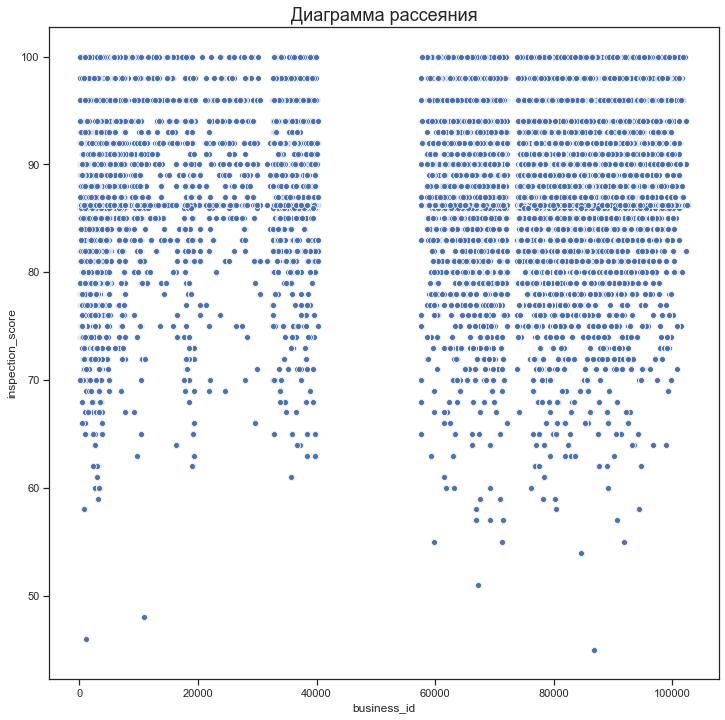

In [12]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.scatterplot(ax=ax, x='business_id', y='inspection_score', data=data)
plt.title(r'Диаграмма рассеяния', fontsize=18, y=1);